# **This is an adaption of a GitHub notebook tha looks at Reddits on wallstreets bets. The Notebook is divided into two sections:**
1. [Oringial Section](#1---Oringial-Section)

that does the basic analsysis. We need to run this to set up the datastructures in the notebook

2. [New Section](#2---New-Section)

That builds on the data structures<br>


# 1. Oringial Section
## **This is a initial descriptive analysis of the Reddit wallstreetbets posts. It contains a basic statistics of words, character count, and occurence. At the bottom, you will find the analysis of the most common mentioned NYSE or other stock tickers. Enjoy!**

## section deteleted..

# 2 - New Section
to combine Title and Body to 

## Step 1 Set up (From Original code)

In [1]:
import os
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import date, datetime
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats
from nltk.corpus import stopwords
from collections import Counter


Bad key "text.kerning_factor" on line 4 in
C:\Users\Hassan\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# additional imports
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime
import time
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
# from datetime import date, datetime
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [5]:
from alpaca_trade_api.rest import TimeFrame

#### 1.1 Read file and check file

In [8]:
# for testing delete
df = pd.read_csv('./reddit_wsb.csv')
df.head(2)

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10


#### 1.2 Drop useless columns

In [9]:
# for testing delete
df = df.drop(columns=['id', 'url', 'created'])
df.head(2)

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10


#### 1.3 Add a few data realted columns for further analysis

In [11]:
# for testing delete
from datetime import date, datetime
year_col = []
month_col = []
hour_col = []
minute_col = []
for i, content in df['timestamp'].items():
    t1 = datetime.strptime(content, '%Y-%m-%d %H:%M:%S')
    year_col.append(t1.year)
    month_col.append(t1.month)
    hour_col.append(t1.hour)
    minute_col.append(t1.minute)
df['year'] = year_col
df['month'] = month_col
df['hour'] = hour_col
df['minute'] = minute_col
df.head(2)

,title,score,comms_num,body,timestamp,year,month,hour,minute
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32


#### Normalize the text to be lowercase

In [12]:
# for testing delete
df['title'] = df['title'].str.lower()
df['body'] = df['body'].str.lower()

In [ ]:
# for testing delete
df.drop_duplicates(subset=['title'], keep='first', inplace=True)
df.shape

#### 1.4 Descriptive statistics - title

**Count the number of characters and length of a title**

In [ ]:
# for testing delete
count = df['title'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

print("Total number of words: ", count.sum(), "words")

In [ ]:
# for testing delete
print("Average number of words per post: ", round(count.mean(),2), "words")
print("Max number of words per post: ", count.max(), "words")
print("Min number of words per post: ", count.min(), "words")

In [6]:
def word_count(df):
    """
    This function takes the dataframe and adds a new colun with the number of words.
    :param df: The dataframe to be transformed.
    :return: The transformed dataframe.
    """
    words_count = []
    for i, content in df['title'].items():
        new_values =[]
        new_values = content.split()
        words_count.append(len(new_values))
    df['title_word_count'] = words_count
    return df

# df = word_count(df)

# df.head(2)

In [ ]:
# for testing delete
df['title_length'] = df['title'].str.len()

print("Total length of a dataset: ", df.title_length.sum(), "characters")
print("Average length of a tweet: ", round(df.title_length.mean(),0), "characters")
print(df.head(2))

In [ ]:
#for testing delte
df.head(2)

#### 1.5 function to get data and clean up in two function
First Function to read from file. This can be replace by reading real data<br>
Second Function to combine and clean the data as in functions above

### **start testing here after loading libraries**

In [92]:
# start testing here
df_raw = pd.read_csv('./reddit_wsb.csv')

In [7]:
def clean_data(in_df):
    #clean data and return a "standrd form"
    # input input data frame as describe above
    # output: cleand data frame
    from datetime import date, datetime # get librareis
    df = in_df.copy() # make a copy
    df = df.drop(columns=['id', 'url', 'created']) # drop unused columns
    
    #add date and time
    year_col = []
    month_col = []
    hour_col = []
    minute_col = []
    day_col = [] # v 1.6 add day colummn
    date_col = [] #
    for i, content in df['timestamp'].items():
        t1 = datetime.strptime(content, '%Y-%m-%d %H:%M:%S')
        year_col.append(t1.year)
        month_col.append(t1.month)
        hour_col.append(t1.hour)
        minute_col.append(t1.minute)
        day_col.append(t1.day) #v 1.6 add day column
        date_col.append(t1.date())
    df['year'] = year_col
    df['month'] = month_col
    df['hour'] = hour_col
    df['minute'] = minute_col 
    df['day'] = day_col # v 1.6 add day col
    df['date'] = date_col
    
    #Normalize the text to be lowercase
    df['title'] = df['title'].str.lower()
    df['body'] = df['body'].str.lower()
    df.drop_duplicates(subset=['title'], keep='first', inplace=True)

    #Count the number of characters and length of a title
    df = word_count(df)
    df['title_length'] = df['title'].str.len()
    
    #return value
    return df

In [93]:
# debug delete
df = clean_data(df_raw)
df.head(2)
# datetime.strptime(content, '%Y-%m-%d %H:%M:%S')
# test_ymd = datetime.strptime(df['timestamp'][0], '%Y-%m-%d %H:%M:%S')
# test_ymd.day

,title,score,comms_num,body,timestamp,year,month,hour,minute,day,date,title_word_count,title_length
0,"it's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37,28,2021-01-28,11,59
1,math professor scott steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32,28,2021-01-28,12,80


## Step 2, Combine Title and Body (start of new code)

In [ ]:
# df.head(2)

In [94]:
# debug delete
# make a copy so original is not damanged and drop where there is no text in title or body
new_df = df[~(df['title'].isna() & df ['body'].isna() )].copy()
# convertitle and body to string and concaterante
new_df ['title_body'] = df['title'].astype(str) + ' ' + df ['body'].astype(str)
new_df.head()

,title,score,comms_num,body,timestamp,year,month,hour,minute,day,date,title_word_count,title_length,title_body
0,"it's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37,28,2021-01-28,11,59,"it's not about the money, it's about sending a..."
1,math professor scott steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32,28,2021-01-28,12,80,math professor scott steiner says the numbers ...
2,exit the system,0,47,the ceo of nasdaq pushed to halt trading “to g...,2021-01-28 21:30:35,2021,1,21,30,28,2021-01-28,3,15,exit the system the ceo of nasdaq pushed to ha...
3,new sec filing for gme! can someone less retar...,29,74,NaN,2021-01-28 21:28:57,2021,1,21,28,28,2021-01-28,13,75,new sec filing for gme! can someone less retar...
4,"not to distract from gme, just thought our amc...",71,156,NaN,2021-01-28 21:26:56,2021,1,21,26,28,2021-01-28,15,79,"not to distract from gme, just thought our amc..."


#### 2.1 combine title and body in to one column

In [8]:
def combine_columns(in_df, in_col1, in_col2):
    #combine two columns into one
    #convert columns to text and concat
    #input:
    #in_df - datafraem
    #in_col1 - name of column 1
    #in_col2 - name of column 2
    #return data_frame with extract column
    
#     # make a copy so original is not damanged and drop where there is no text in title or body

    # convertitle and body to string and concaterante
    new_df = in_df.copy()
    new_df [in_col1 + '_' + in_col2] = in_df[in_col1].astype(str) + ' ' + in_df [in_col2].astype(str)
    return new_df


In [95]:
# for testing delete
test_df = combine_columns(df, 'title', 'body')
test_df.head(2)

,title,score,comms_num,body,timestamp,year,month,hour,minute,day,date,title_word_count,title_length,title_body
0,"it's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37,28,2021-01-28,11,59,"it's not about the money, it's about sending a..."
1,math professor scott steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32,28,2021-01-28,12,80,math professor scott steiner says the numbers ...


#### 2.2 routine to do count of ticker.

In [9]:
def find_comment_count(in_df, in_word_list, in_column): 
    # purpose: finds count of words in a column and creates named coumns with counts
    #inputs: 
    #in_df - input dataframe 
    #in_word_list list of words to find
    #in_column the column in which the wordsare
    #output:
    #a copy of the original data with columns added for word count
    
    #code here
    #put in error handler
    try:
        tmp_df = in_df.copy() #make a copy of the dataframe
        tmp_df [in_column] = tmp_df [in_column].astype(str) # convrt to string
        srch_word_list = [str(x) for x in in_word_list] #convert everthing words list to string
        #wordList = re.sub("[^\w]", " ",  mystr).split()
        tmp_df[in_column + '_list'] = tmp_df[in_column].apply (lambda x: re.sub("[^\w]", " ",  x).split()) # convert into a list of words
        
        # loop through list of words and create counts
        for cur_word in srch_word_list:
            # v 1.8 dont look at list,  look in original column with 
            #tmp_df [cur_word + '_count'] = tmp_df[in_column + '_list'].apply(lambda x: x.count(cur_word))
            lower_word = cur_word.lower()# v 1.8
            tmp_df [cur_word + '_count'] = tmp_df[in_column].apply(lambda x: x.count(lower_word)) # v 1.8
        return tmp_df
        
    except:
        #if eror then return null
        return  
        

In [96]:
# delete
test_df = find_comment_count(test_df, ['GME'], 'title_body')

In [97]:
# delete
test_df.head(2)

,title,score,comms_num,body,timestamp,year,month,hour,minute,day,date,title_word_count,title_length,title_body,title_body_list,GME_count
0,"it's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37,28,2021-01-28,11,59,"it's not about the money, it's about sending a...","[it, s, not, about, the, money, it, s, about, ...",0
1,math professor scott steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32,28,2021-01-28,12,80,math professor scott steiner says the numbers ...,"[math, professor, scott, steiner, says, the, n...",0


## Step 3 Get emotions from each combined message

In [22]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### 3.1 function to add vader emotion to each message

In [10]:
# function to calculate vader sentiment
def add_vader_compound(in_df, in_column, in_tick_mention, in_tick):
    #take and input column, add vader sentiment
    # input:
    # in_df  - put put df
    # in_column - text for which 
    # in_tick_mention - number of times ticker 
    # in_tick - name for the ticke
    #output:
    #df with two addition coumnns
    #additional col1 = in_column + '_sent' - sentiment for the in_column
    #           cik2 = in_tick_sent - sentiment where ticker is mentioned
    
    
    
    # make sure nltk and vader is downloaded 
    # if not downloaded, uncomment and download
    # Download/Update the VADER Lexicon
    #nltk.download('vader_lexicon')
    #from nltk.sentiment.vader import SentimentIntensityAnalyzer
    # Initialize the VADER sentiment analyzer
    # analyzer = SentimentIntensityAnalyzer()
    
    
#     nltk.download('vader_lexicon')


     try:
        tmp_df = in_df.copy() #make a copy of the dataframe
        tmp_df [in_column] = tmp_df [in_column].astype(str) # convrt to string
        analyzer = SentimentIntensityAnalyzer() # set analyzer
        #total sentiment
        tot_sent = in_column + '_sent'
        tmp_df[tot_sent] = tmp_df [in_column].apply (lambda x: analyzer.polarity_scores(x)['compound'])
        #sentiment on ticker mention
        tmp_df[in_tick + '_sent'] = tmp_df.apply(lambda x: x[in_tick_mention] if x[in_tick_mention] == 0 else x[tot_sent], axis = 1)
            
        return tmp_df
        
     except:
         #if eror then return null
         print ('error in add_vader_compound')
         return 
    

In [90]:
# delete
# test code for vader
# test= test_df.copy()
in_tick = 'GME'
test1_df = add_vader_compound(test_df, 'title_body', in_tick + '_count',in_tick)


In [91]:
test1_df.head(5)

,title,score,comms_num,body,timestamp,year,month,hour,minute,day,date,title_word_count,title_length,title_body,title_body_list,GME_count,title_body_sent,GME_sent,GME_count_sum,title_body_sent_sum
0,"it's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37,28,2021-01-28,11,59,"it's not about the money, it's about sending a...","[it, s, not, about, the, money, it, s, about, ...",0,0.0000,0.0000,656,29.9272
1,math professor scott steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32,28,2021-01-28,12,80,math professor scott steiner says the numbers ...,"[math, professor, scott, steiner, says, the, n...",0,-0.6249,0.0000,656,29.9272
2,exit the system,0,47,the ceo of nasdaq pushed to halt trading “to g...,2021-01-28 21:30:35,2021,1,21,30,28,2021-01-28,3,15,exit the system the ceo of nasdaq pushed to ha...,"[exit, the, system, the, ceo, of, nasdaq, push...",1,-0.4199,-0.4199,656,29.9272
3,new sec filing for gme! can someone less retar...,29,74,NaN,2021-01-28 21:28:57,2021,1,21,28,28,2021-01-28,13,75,new sec filing for gme! can someone less retar...,"[new, sec, filing, for, gme, can, someone, les...",1,-0.3397,-0.3397,656,29.9272
4,"not to distract from gme, just thought our amc...",71,156,NaN,2021-01-28 21:26:56,2021,1,21,26,28,2021-01-28,15,79,"not to distract from gme, just thought our amc...","[not, to, distract, from, gme, just, thought, ...",1,0.2235,0.2235,656,29.9272


In [38]:
test2_df = test1_df.copy()
tick = 'GME'
tick_sent = tick + '_sent'
tick_count = tick + '_count'
# type(test2_df[tick_count][0])
# test1_df['up_neu_dn'] = test1_df ['pct_ch'].apply (lambda x: -1 if x < -zero_rng else 1 if x > zero_rng else 0)
test2_df[tick_sent] = test2_df.apply (lambda x: x[tick_count] if x[tick_count] == 0 else x['title_body_sent'], axis = 1)
# test2_df[tick_sent] = test2_df.apply (lambda x: x['GME_count'], axis = 1)
test2_df.head(2)

,title,score,comms_num,body,timestamp,year,month,hour,minute,day,date,title_word_count,title_length,title_body,title_body_list,GME_count,title_body_sent,GME_sent
0,"it's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37,28,2021-01-28,11,59,"it's not about the money, it's about sending a...","[it, s, not, about, the, money, it, s, about, ...",0,0.0000,0.0
1,math professor scott steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32,28,2021-01-28,12,80,math professor scott steiner says the numbers ...,"[math, professor, scott, steiner, says, the, n...",0,-0.6249,0.0


In [155]:
# dletee
analyzer = SentimentIntensityAnalyzer()
test['sent'] = test['title_body'].apply (lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
# delete
test.tail(2)

## Step 4 get stock price at that time

In [11]:
def get_prices (in_tick, in_strt_date, in_end_date,in_timeframe, in_env_path):
    # return a dataframe with stock price info from Alpaca by the minute
    # inputs:
    # in_tick - string with ticker symbol
    # in_start_date as a start date in format: beg_date = '2021-01-05'
    # in_end_date in format: end_date = '2021-01-05'
    # in_timeframe set as interval for stock price
    # in_env_path path for enviornment file
    # return:
    # data frame with stock prices.
    # To do - put output structure
    
    #note works for 1000 items. how to get longer times.
    from alpaca_trade_api.rest import TimeFrame
    try:
        #load environment
        load_dotenv(in_env_path)
        
        #get alpaka keys
        alpaca_api_key = os.getenv("ALPACA_API_KEY")
        alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#         print (f'alpaca api {alpaca_api_key}\n')
#         print (f'alpaca secret {alpaca_secret_key}\n')
        #set up alpaca
        api = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version = "v2"
        )
    
        start =  pd.Timestamp(f'{in_strt_date} 09:30:00-0400', tz='America/New_York').replace(hour=9, minute=30, second=0).astimezone('GMT').isoformat()[:-6]+'Z'
        end   =  pd.Timestamp(f'{in_end_date} 16:00:00-0400', tz='America/New_York').replace(hour=16, minute=0, second=0).astimezone('GMT').isoformat()[:-6]+'Z'
#         print (f'start: {start}\n')
#         print (f'end: {end}\n')
#         prices = api.get_barset(in_tick, TimeFrame.Hours,limit=1000, start=start, end=end).df
        prices = api.get_barset(in_tick, in_timeframe,limit=1000, start=start, end=end).df
        
        #add date colum
        prices['date'] = prices.index.map(lambda x: x.date())
        
        return prices

    except:
        return null

In [14]:
# delete
from alpaca_trade_api.rest import TimeFrame
price_df = get_prices('GME', '2021-01-28', '2021-06-01', '1D','test1.env' )

In [123]:
# delete
price_df.index[0].date()
test_df = price_df.copy()
test_df.head(2)

GME                                    \
                             open    high     low   close    volume   
time                                                                  
2021-01-28 00:00:00-05:00  265.00  483.00  112.25  197.44  46894357   
2021-01-29 00:00:00-05:00  379.71  413.98  250.00  328.24  44002649   

                                 date  
                                       
time                                   
2021-01-28 00:00:00-05:00  2021-01-28  
2021-01-29 00:00:00-05:00  2021-01-29

## Step 5 combine price with data and emotion



In [12]:


def comb_sent_mention(in_df, in_tick, in_timeframe,in_start_date, in_end_date, in_env_file, in_col1, in_col2 ):
    #creates a combined data frame for a from data struct
    # input:
    # in_df = input data frame
    # in_tick =  ticker symbo
    # in_timeframe = suggest '1D'
    # in_start_date = in the form'2021-01-28'
    # in_end_date = in the form '2021-01-28'
    # in_env_file = in this case'test1.env' 
    # in_col1 = in this case 'title'
    # in_col2 = in this case 'body'   
    # output:
    # cobined dta frame

#     price_df = get_prices(in_tick, in_start_date, in_end_date, in_timeframe,in_env_file) # get price from alpaa - not used here..
    df_clean = clean_data(in_df) # clean it up
    df = combine_columns(df_clean, in_col1, in_col2) # combine title and body
    comb_col_title = in_col1 + '_' + in_col2 # combine the column titles
    df = find_comment_count(df, [in_tick], comb_col_title) # find number of mentions 
    df = add_vader_compound(df, comb_col_title, in_tick + '_count', in_tick) # add emotion 2.5 updated
# test1_df = add_vader_compound(test_df, 'title_body', in_tick + '_count',in_tick)    
    #v 2.4 make column that is sentiment only if ticker is mentioend.
    # ticker _ count
    # title_body_sent
    # 
    #sum sentiment and count by day - future fix add variable length
    
    grpby_cols = ['year', 'month', 'day']
    sum_by_cols = [in_tick + '_count', comb_col_title + '_sent', in_tick + '_sent' ] # 2.5; summarize all ticker sentimetn
    
    tmp_df = df.groupby(grpby_cols)[sum_by_cols].sum().add_suffix('_sum')
    df = df.join (tmp_df, on = grpby_cols)
    
    return df
    
    

In [15]:
# delete
in_df = pd.read_csv('./reddit_wsb.csv')
test_df = comb_sent_mention(in_df, 'GME', '1D', '2021-01-28','2021-06-28' , 'test1.env' ,  'title', 'body')

In [16]:
# delete
test_df.sample(2)

,title,score,comms_num,body,timestamp,year,month,hour,minute,day,...,title_word_count,title_length,title_body,title_body_list,GME_count,title_body_sent,GME_sent,GME_count_sum,title_body_sent_sum,GME_sent_sum
11068,gme buy issue,1,1,i’m trying to buy one share of gme and it’s sa...,2021-01-29 02:32:11,2021,1,2,32,29,...,3,13,gme buy issue i’m trying to buy one share of g...,"[gme, buy, issue, i, m, trying, to, buy, one, ...",2,0.2960,0.296,6254,-125.7006,30.0444
9552,[serious] why do people use robin hood?⚠️,1,4,unless i'm reading this wrong (https://www.sec...,2021-01-29 02:16:02,2021,1,2,16,29,...,7,41,[serious] why do people use robin hood?⚠️ unle...,"[serious, why, do, people, use, robin, hood, u...",0,0.8068,0.000,6254,-125.7006,30.0444


## Step 6 combine with daily price of stock.

In [17]:
# create new dataframe of only date, sentiment, world count, price, volueme mentions
in_tick = 'GME'
in_tick_count = in_tick + '_count_sum'
in_tick_sent_sum = in_tick + '_sent_sum'
new_df = test_df[['date', in_tick_count, 'title_body_sent_sum', in_tick_sent_sum]].copy()
new_df.drop_duplicates(inplace = True)
new_df.rename (columns = {'GME_count_sum': 'mentions', 'title_body_sent_sum': 'sentiment', in_tick_sent_sum: 'ticker_sent' }, inplace = True)
new_df.set_index('date', inplace = True)
new_df.head(2)

,mentions,sentiment,ticker_sent
date,,,
2021-01-28,656,29.9272,-0.1004
2021-01-29,6254,-125.7006,30.0444


In [105]:
# new_prices = price_df [['date']]
# new_prices = price_df[price_df.loc['GME']['close']]
# delete not needed in testing
new_prices = price_df ['GME']
new_prices ['date'] = price_df['date']
new_prices.set_index('date', inplace = True)
new_prices.head(2)

,open,high,low,close,volume
date,,,,,
2021-01-28,265.00,483.00,112.25,197.44,46894357
2021-01-29,379.71,413.98,250.00,328.24,44002649


In [18]:
price_df = get_prices('GME', '2021-01-28', '2021-06-01', '1D','test1.env' )

In [20]:
# new_prices = price_df.copy()

new_prices = pd.DataFrame()
# new_prices['close']  = price_df['GME', 'close'].copy()
# new_prices['volume'] = price_df['GME', 'close'].copy()
# new_prices['date'] = new_prices.index.map(lambda x: x.date())
# new_prices.reset_index(inplace = True)
# new_prices.drop (columns = 'time', inplace = True)
new_prices = price_df ['GME'].copy()
new_prices['date'] = new_prices.index.map(lambda x: x.date())
new_prices.reset_index(inplace = True)
new_prices.drop (columns = ['time', 'open', 'high', 'low'], inplace = True)
new_prices.set_index('date', inplace = True) 
new_prices.head(2)


,close,volume
date,,
2021-01-28,197.44,46894357
2021-01-29,328.24,44002649


In [21]:
new_df.shape

(139, 3)

In [23]:
output_df = new_prices.join (new_df, how = 'left', on = 'date')
output_df ['stock'] = 'GME'
# output_df.head()
output_df.shape
output_df.head()
# output_df.to_csv('sample_gme.csv')

,close,volume,mentions,sentiment,ticker_sent,stock
date,,,,,,
2021-01-28,197.4400,46894357,656.0,29.9272,-0.1004,GME
2021-01-29,328.2400,44002649,6254.0,-125.7006,30.0444,GME
2021-02-01,227.0000,32080874,905.0,149.0855,91.9177,GME
2021-02-02,90.4700,71418097,964.0,141.5159,73.0532,GME
2021-02-03,92.0431,37591533,1438.0,226.2474,122.2054,GME


## Step 7 Start ML part

### 7.1 Function to create combined dataframe for macine learning
1. take company 

In [24]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [25]:
# create a copy.
test1_df = output_df.copy()

In [26]:
test1_df ['pct_ch'] = test1_df['close'].pct_change()
zero_rng = .01
test1_df['up_neu_dn'] = test1_df ['pct_ch'].apply (lambda x: -1 if x < -zero_rng else 1 if x > zero_rng else 0)
test1_df ['pct_chg_l1'] = test1_df ['pct_ch'].shift(1)
test1_df ['up_neu_dn_l1'] = test1_df ['up_neu_dn'].shift(1)
test1_df.dropna(inplace = True)
test1_df.head()

,close,volume,mentions,sentiment,ticker_sent,stock,pct_ch,up_neu_dn,pct_chg_l1,up_neu_dn_l1
date,,,,,,,,,,
2021-02-01,227.0000,32080874,905.0,149.0855,91.9177,GME,-0.308433,-1,0.662480,1.0
2021-02-02,90.4700,71418097,964.0,141.5159,73.0532,GME,-0.601454,-1,-0.308433,-1.0
2021-02-03,92.0431,37591533,1438.0,226.2474,122.2054,GME,0.017388,1,-0.601454,-1.0
2021-02-04,53.3780,59040312,985.0,238.7981,97.6963,GME,-0.420076,-1,0.017388,1.0
2021-02-05,63.7601,76267482,1538.0,264.2901,145.1980,GME,0.194501,1,-0.420076,-1.0


In [57]:
# test1_df.iloc[:, 3]

In [27]:
# shift_df = test1_df.shift(1)
# shift_df
# create a funtion to do this later
win_size = 5
feat_col = 4
targ_col = 6
X, y =  window_data(test1_df, win_size, feat_col, targ_col)
# print (f"X sample values:\n{X[:5]} \n")
# print (f"y sample values:\n{y[:5]}")

In [28]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [29]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [30]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# print (f"X_train sample values:\n{X_train[:5]} \n")
# print (f"X_test sample values:\n{X_test[:5]}")

In [123]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [31]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [32]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [33]:
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
53/53 [==============================] - 5s 5ms/step - loss: 0.0664
Epoch 2/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0294
Epoch 3/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0218A: 0s - loss: 0.
Epoch 4/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0242
Epoch 5/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0222
Epoch 6/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0224
Epoch 7/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0225
Epoch 8/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0245
Epoch 9/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0246
Epoch 10/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0200


In [34]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.0032


0.0032211237121373415

In [35]:
# Make some predictions
predicted = model.predict(X_test)

In [36]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [37]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = test1_df.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
date,,
2021-04-26,0.116402,0.014965
2021-04-27,0.054502,0.014926
2021-04-28,0.005112,0.015295
2021-04-29,-0.015930,0.015398
2021-04-30,-0.013973,0.015825


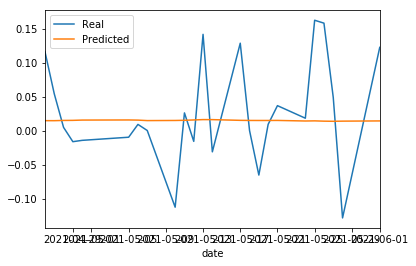

In [38]:
# Plot the real vs predicted prices as a line chart
stocks.plot()